In [1]:
import scipy.io as scio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
test_data_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/test_data.mat'  
test_data = scio.loadmat(test_data_mat)['test_data'] 
test_label_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/test_label.mat'  
test_label = scio.loadmat(test_label_mat)['test_label'] 
train_data_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/train_data.mat'  
train_data = scio.loadmat(train_data_mat) ['train_data']
train_label_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/train_label.mat'  
train_label = scio.loadmat(train_label_mat) ['train_label']

In [3]:
train_data.shape

(499, 310)

In [20]:
train_label.shape

(499, 1)

In [4]:
sess = tf.InteractiveSession()

In [5]:
xs = tf.placeholder(tf.float32, shape=[None, 310])
ys = tf.placeholder(tf.float32, shape=[None, 1])

In [6]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [7]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

In [13]:
hidden1 = add_layer(xs, 310, 10, activation_function=tf.nn.softmax)
prediction = add_layer(hidden1, 10, 3, activation_function=tf.nn.softmax)

In [17]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [22]:
for i in range(100):
    sess.run(train_step, feed_dict={xs: train_data, ys: train_label})
    if i % 5 == 0:
        print(compute_accuracy(
            test_data, test_label))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


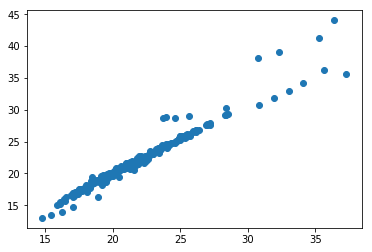

In [12]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(train_data[11], test_data[11])
plt.ion()#本次运行请注释，全局运行不要注释
plt.show()